In [5]:
import tensorflow as tf
from tensorflow.keras import layers, models
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import matplotlib.pyplot as plt

In [6]:
IMG_SIZE = (224, 224)
BATCH = 32
AUTOTUNE = tf.data.AUTOTUNE

# Load datasets
train_ds = tf.keras.utils.image_dataset_from_directory(
    "../data/train",
    image_size=IMG_SIZE,
    batch_size=BATCH,
    validation_split=None,
    seed=123
)

val_ds = tf.keras.utils.image_dataset_from_directory(
    "../data/val",
    image_size=IMG_SIZE,
    batch_size=BATCH,
    validation_split=None,
    seed=123
)

# Get class names
class_names = train_ds.class_names
print(f"Classes: {class_names}")

# Data preprocessing and augmentation
def preprocess_data(image, label):
    image = tf.cast(image, tf.float32)
    image = image / 255.0  # Normalize to [0, 1]
    return image, label

# Data augmentation for training
data_augmentation = tf.keras.Sequential([
    layers.RandomFlip("horizontal"),                 # flip kanan-kiri
    layers.RandomRotation(0.15),                     # rotasi ±15%
    layers.RandomZoom(0.15),                         # zoom in/out
    layers.RandomTranslation(0.1, 0.1),              # geser ±10%
    layers.RandomContrast(0.15),                     # kontras
    layers.GaussianNoise(0.02),                      # noise ringan
], name="data_aug")

def augment_data(image, label):
    image = data_augmentation(image)
    return image, label

# Apply preprocessing
train_ds = train_ds.map(preprocess_data, num_parallel_calls=AUTOTUNE)
val_ds = val_ds.map(preprocess_data, num_parallel_calls=AUTOTUNE)

# Apply augmentation only to training data
train_ds = train_ds.map(augment_data, num_parallel_calls=AUTOTUNE)

# Optimize pipeline performance
train_ds = train_ds.cache().prefetch(buffer_size=AUTOTUNE)
val_ds = val_ds.cache().prefetch(buffer_size=AUTOTUNE)

Found 9341 files belonging to 4 classes.
Found 2337 files belonging to 4 classes.
Classes: ['a_Baik', 'b_Sedang', 'c_Tidak_Sehat', 'd_Sangat_Tidak_Sehat']


In [65]:
# Ambil satu contoh gambar dari train_ds (sebelum augmentasi)
for images, labels in val_ds.take(1):   # pakai val_ds biar tanpa augmentasi
    sample_image = images[0]
    sample_label = labels[0]
    break

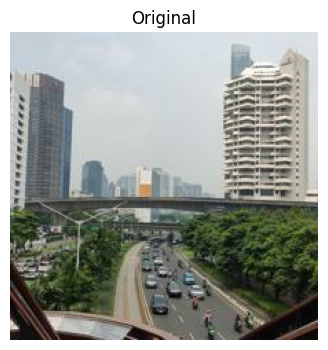

In [66]:
plt.figure(figsize=(4,4))
plt.imshow(sample_image.numpy())
plt.title("Original")
plt.axis("off")
plt.show()

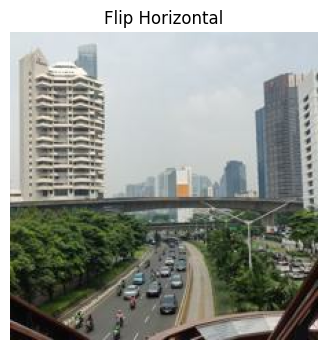

In [67]:
flip_layer = tf.keras.layers.RandomFlip("horizontal")
flipped_img = flip_layer(tf.expand_dims(sample_image, 0))[0]

plt.figure(figsize=(4,4))
plt.imshow(flipped_img.numpy())
plt.title("Flip Horizontal")
plt.axis("off")
plt.show()

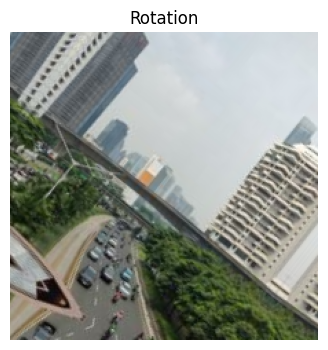

In [68]:
rot_layer = tf.keras.layers.RandomRotation(0.15)
rotated_img = rot_layer(tf.expand_dims(sample_image, 0))[0]

plt.figure(figsize=(4,4))
plt.imshow(rotated_img.numpy())
plt.title("Rotation")
plt.axis("off")
plt.show()

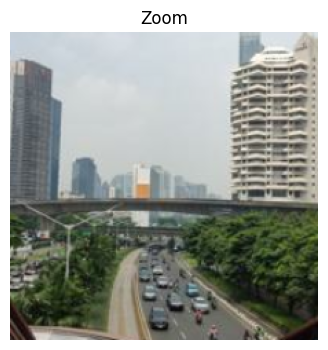

In [74]:
zoom_layer = tf.keras.layers.RandomZoom(0.15)
zoomed_img = zoom_layer(tf.expand_dims(sample_image, 0))[0]

plt.figure(figsize=(4,4))
plt.imshow(zoomed_img.numpy())
plt.title("Zoom")
plt.axis("off")
plt.show()

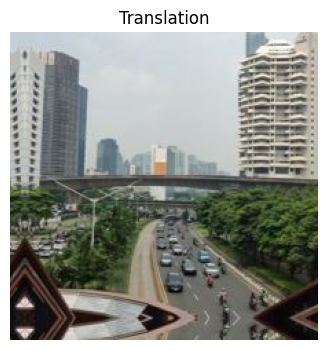

In [77]:
trans_layer = tf.keras.layers.RandomTranslation(0.1, 0.1)
trans_img = trans_layer(tf.expand_dims(sample_image, 0))[0]

plt.figure(figsize=(4,4))
plt.imshow(trans_img.numpy())
plt.title("Translation")
plt.axis("off")
plt.show()

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers). Got range [0.0..1.0562572].


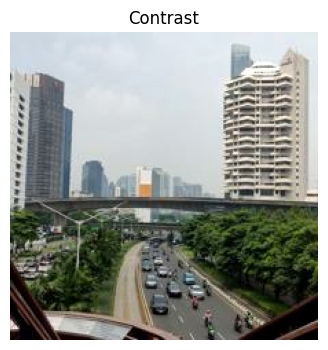

In [80]:
contrast_layer = tf.keras.layers.RandomContrast(0.15)
contrast_img = contrast_layer(tf.expand_dims(sample_image, 0))[0]

plt.figure(figsize=(4,4))
plt.imshow(contrast_img.numpy())
plt.title("Contrast")
plt.axis("off")
plt.show()

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers). Got range [-0.06353096..1.045923].


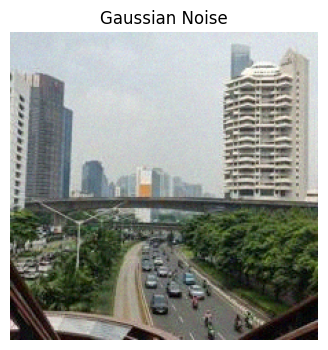

In [82]:
noise_layer = tf.keras.layers.GaussianNoise(0.02)
noise_img = noise_layer(tf.expand_dims(sample_image, 0), training=True)[0]

plt.figure(figsize=(4,4))
plt.imshow(noise_img.numpy())
plt.title("Gaussian Noise")
plt.axis("off")
plt.show()